<a href="https://colab.research.google.com/github/brenoslivio/SCC0652_Computational_Visualization/blob/master/notebooks/Project-2/Projeto_2_Visualizacao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 2 - Visualização de dados



<br>


**SCC0652 - Visualização Computacional (2020/2)**

<br>

[Projeto no GitHub](https://github.com/brenoslivio/SCC0652_Computational_Visualization)

<br>

**Alunos:**

Afonso Henrique Piacentini Garcia, Nº USP: 9795272

Breno Lívio Silva de Almeida, Nº USP: 10276675

Vitor Henrique Gratiere Torres, Nº USP: 10284952

---

## Sumário


1. [Descrição](#descricao)

  1.1 [dfPokemon.csv](#pokemoncsv)

  1.2 [Visualizações](#visual)

2. [Desenvolvimento](#desenvolvimento)

  2.1 [Visualizando os dados](#visual)

    * [Outliers](#outliers)

    * [Correlações](#corr)

    * [Distribuição](#dist)

  2.2 [Conclusão das visualizações feitas](#conclusao)



## Descrição <a name="descricao"></a>

Essa parte do projeto da disciplina consiste na visualização de um conjunto de dados, um dataset, que no Projeto 1 foi previamente processado e analisado alguns itens foram considerados relevantes para o desenvolvimento do projeto. Lembrando que o conjunto de dados escolhido foi o de [Pokémons](https://www.pokemon.com/br/), do vídeo-game homônimo. Vamos usar o arquivo gerado do projeto anterior para o desenvolvimento dessa parte e possivelmente da seguinte.

### [dfPokemon.csv](https://github.com/brenoslivio/SCC0652_Computational_Visualization/blob/master/notebooks/Project-2/dfPokemon.csv) <a name="pokemoncsv"></a>

*   cod: O número do pokémon na Pokédex;
*   name: O nome do pokémon;
*   generation: a qual geração o pokémon em questão pertence;
*   status: refere-se a raridade do pokémon, variando de normal até mítico;
*   species: apelido dado para cada pokémon baseado em algum de seus atributos;
*   form: discriminante de mega evoluções e outras formas;
*   type1: tipo do pokémon;
*   type2: segundo tipo do pokémon, caso possua.
*   height_m: altura do pokémon em metros;
*   weight_kg: peso do pokémon em kilogramas.
*   total: soma total dos stats do pokémon;
*   hp: stat que indica a vida base do pokémon;
*   attack: stat que indica o poder de ataque fisico base do pokémon;
*   defense: stat que indica a defesa física base do pokémon;
*   spatk: stat que indica o poder de ataque especial do pokémon;
*   spdef: stat que indica o poder de defesa especial do pokémon;
*   speed: stat que indica a velocidade base do pokémon;
*   img: link para a imagem do pokémon;




## Desenvolvimento <a name="desenvolvimento"></a>

Vamos visualizar os dados tendo em mente sua composição total e inferir conclusões acerca das visualizações feitas.

### Visualizando os dados <a name="visual"></a>

A ideia da visualização de dados é muito importante para possibilitar uma identificação mais rápida e precisa sobre informações relevantes de um conjunto de dados, fazendo com que até mesmo leigos sobre um assunto possam pelo menos ter uma breve noção do comportamento dos dados em questão. Para isso precisamos fazer visualizações realmente pensadas e justificadas com base no tipo de dados que estamos lidando.

Essa seção irá servir não somente para mostrar algumas informações interessantes (como outliers, relações, entre outros) por meio de vários tipos de visualizações, mas também para justificar o uso destas. 

Vale lembrar que estamos lidando com um dataset híbrido, contendo diversas categorias como `generation`, `status` e `type1`, e também contendo diversas variáveis numéricas como `height_m`, `weight_kg`, `total`, `hp`, `attack`, `defense`, entre outros. O catálogo [From Data to Viz](https://www.data-to-viz.com/) nos mostra diversas visualizações que podemos fazer com base nesse conjunto de dados híbrido.

#### Outliers <a name="outliers"></a>

Podemos encontrar Outliers por meio de diferentes tipos de visualizações

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('colorblind')  # definicao da paleta de cores

dfPokemon = pd.read_csv(
    "https://raw.githubusercontent.com/brenoslivio/SCC0652_Computational_Visualization/master/notebooks/Project-2/dfPokemon.csv",
    dtype={
        'cod': str,
        'generation': np.int32,
        'height_m': np.float64,
        'weight_kg': np.float64,
        'total': np.int32,
        'hp': np.int32,
        'attack': np.int32,
        'defense': np.int32,
        'spatk': np.int32,
        'spdef': np.int32,
        'speed': np.int32},
    na_values='')

dfPokemon.sample(5)

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
227,186,Politoed,2,Normal,Frog Pokémon,NaN,Water,NaN,1.1,33.9,500,90,75,75,90,100,70,https://img.pokemondb.net/sprites/home/normal/...
832,717,Yveltal,6,Legendary,Destruction Pokémon,NaN,Dark,Flying,5.8,203.0,680,126,131,95,131,98,99,https://img.pokemondb.net/sprites/home/normal/...
596,505,Watchog,5,Normal,Lookout Pokémon,NaN,Normal,NaN,1.1,27.0,420,60,85,69,60,69,77,https://img.pokemondb.net/sprites/home/normal/...
594,503,Samurott,5,Normal,Formidable Pokémon,NaN,Water,NaN,1.5,94.6,528,95,100,85,108,70,70,https://img.pokemondb.net/sprites/home/normal/...
380,321,Wailord,3,Normal,Float Whale Pokémon,NaN,Water,NaN,14.5,398.0,500,170,90,45,90,45,60,https://img.pokemondb.net/sprites/home/normal/...


generation
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total, dtype: object

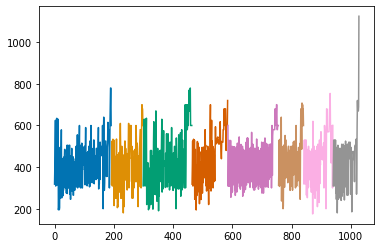

In [ ]:
dfPokemon.groupby("generation")["total"].plot()

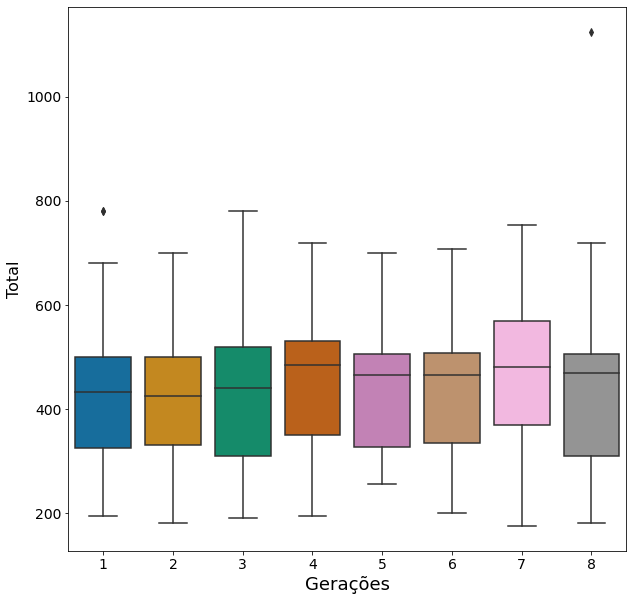

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="generation", y="total", data=dfPokemon)
plt.xlabel('Gerações', fontsize=18)
plt.ylabel('Total', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

#### Correlações <a name="corr"></a>

Encontrar correlações em um conjunto de dados pode ser sempre interessante para descobrir algumas possíveis ligações entre variáveis que não eram exatamente esperadas. Vamos visualizar essas correlações por meio de heatmaps e xxx, usando as conhecidas correlações de Pearson e Spearman.


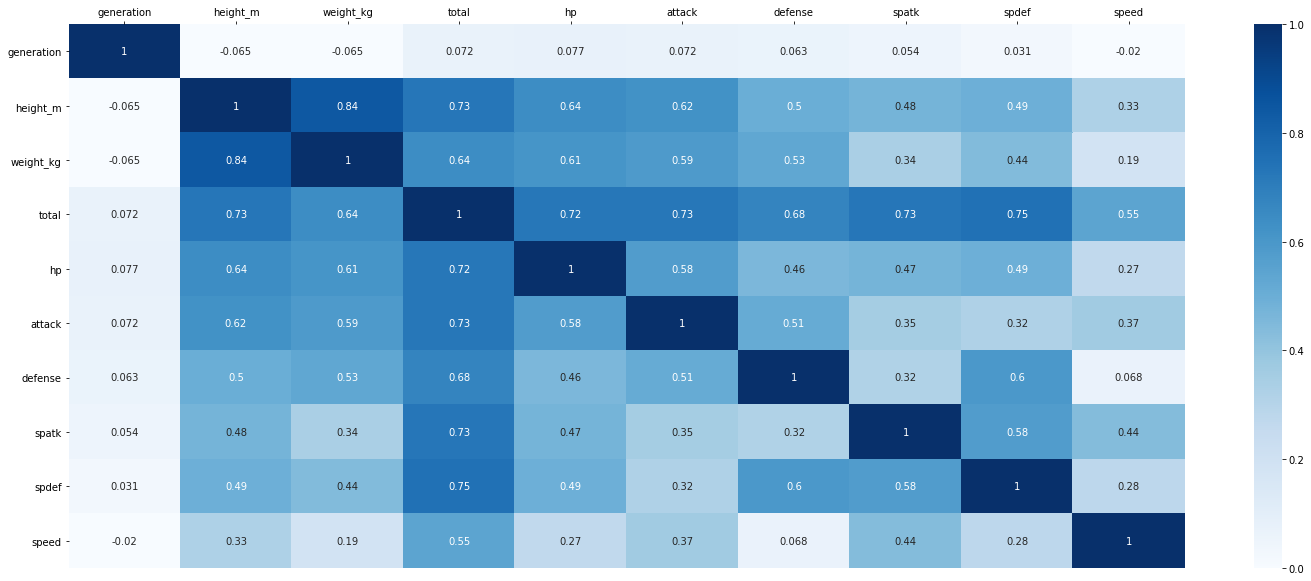

In [ ]:
corrmat = dfPokemon.corr(method='spearman')    
plt.figure(figsize=(25, 10))
sns.heatmap(corrmat, vmax=1., vmin=0,
            annot=True, cmap='Blues').xaxis.tick_top()

#### Distribuição <a name="dist"></a>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf880a6898>,
      dtype=object)

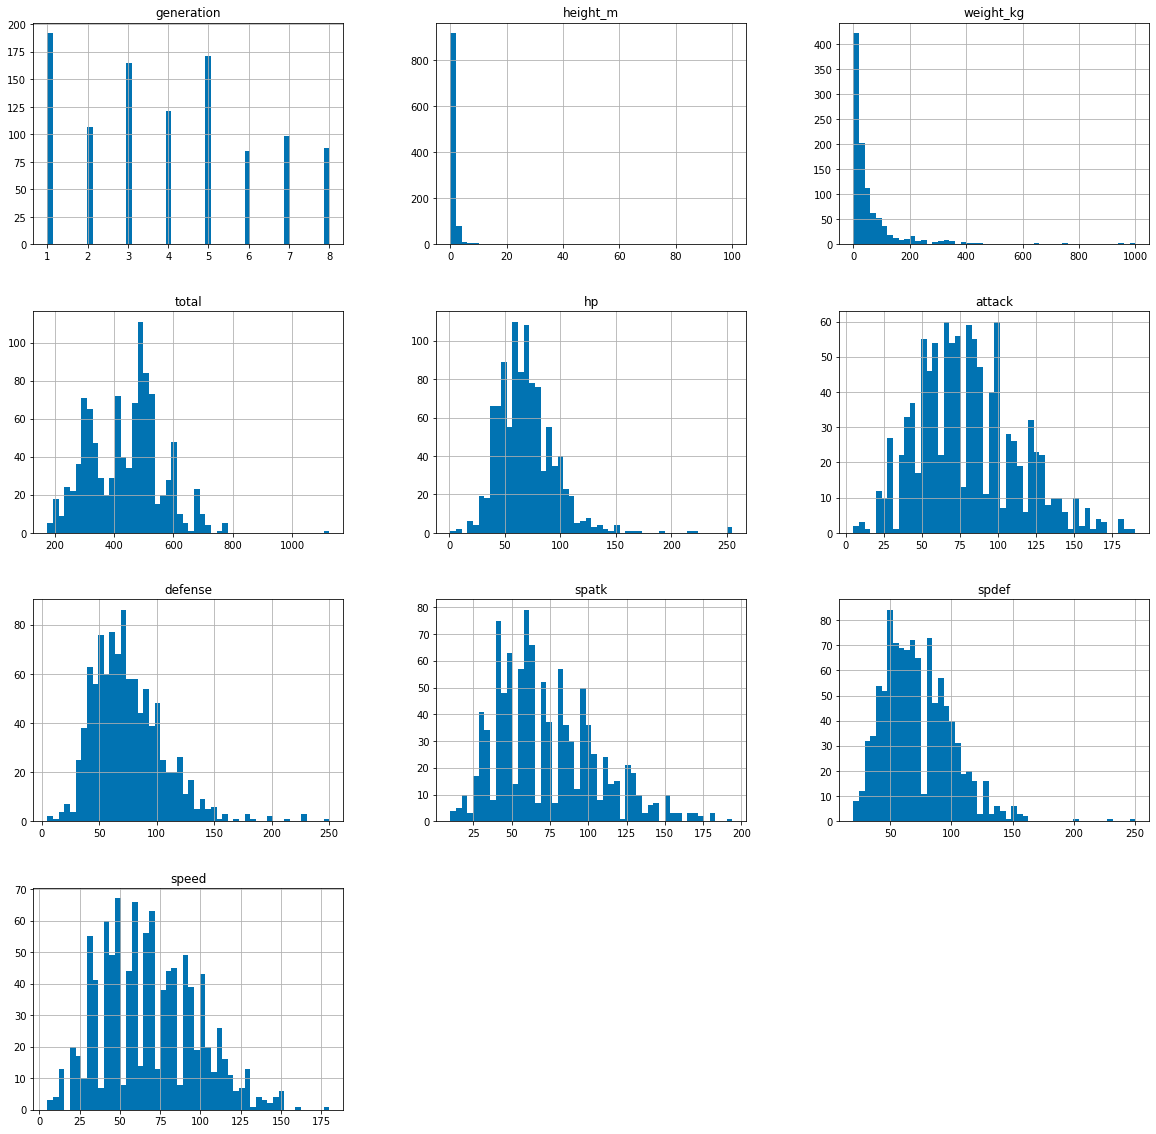

In [ ]:
dfPokemon.hist(bins=50, figsize=(20, 20))

<Figure size 1440x1440 with 0 Axes>

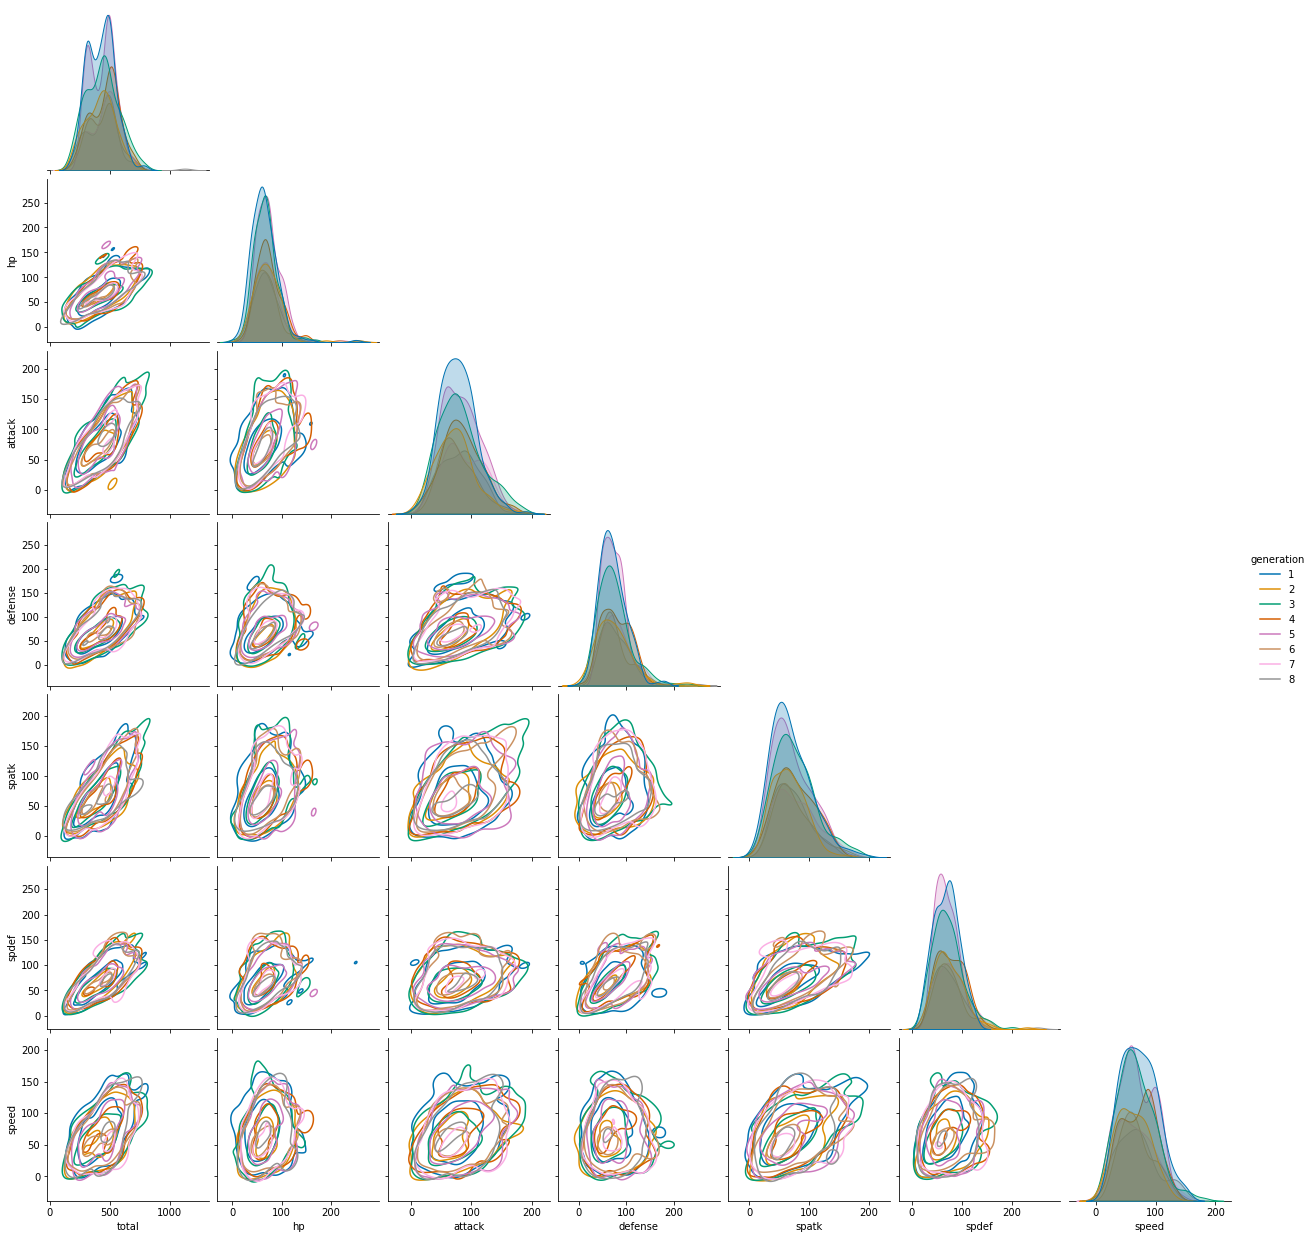

In [ ]:
plt.figure(figsize=(20, 20))
# sns.pairplot(dfPokemon.loc[dfPokemon.loc[:, 'generation'] == 2, :],
sns.pairplot(dfPokemon,
             vars=['total',
                   'hp',
                   'attack',
                   'defense',
                   'spatk',
                   'spdef',
                   'speed'],
             hue='generation',
             palette='colorblind',
             kind='kde',
             corner=True,
             plot_kws={'levels': 3})  # 'fill': True,'alpha': .2

<BarContainer object of 18 artists>

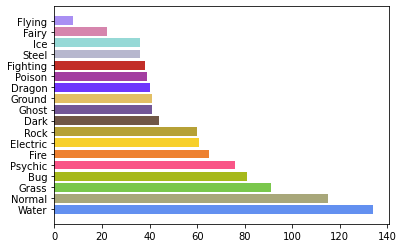

In [ ]:
colorsType = {
    'Bug': [.651, .725, .102, 1.],
    'Dark': [.439, .341, .275, 1.],
    'Dragon': [.435, .208, .988, 1.],
    'Electric': [.969, .816, .173, 1.],
    'Fairy': [.839, .522, .678, 1.],
    'Fighting': [.761, .180, .157, 1.],
    'Fire': [.933, .506, .188, 1.],
    'Flying': [.663, .561, .953, 1.],
    'Ghost': [.451, .341, .592, 1.],
    'Grass': [.478, .780, .298, 1.],
    'Ground': [.886, .749, .396, 1.],
    'Ice': [.588, .851, .839, 1.],
    'Normal': [.659, .655, .478, 1.],
    'Poison': [.639, .243, .631, 1.],
    'Psychic': [.976, .333, .529, 1.],
    'Rock': [.714, .631, .212, 1.],
    'Steel': [.718, .718, .808, 1.],
    'Water': [.388, .565, .941, 1.]
}

countTypes = dfPokemon.loc[:, ('type1')].value_counts()
plt.barh(y=countTypes.keys(), width=countTypes.values, color=countTypes.keys().map(colorsType))

#### Wordcloud

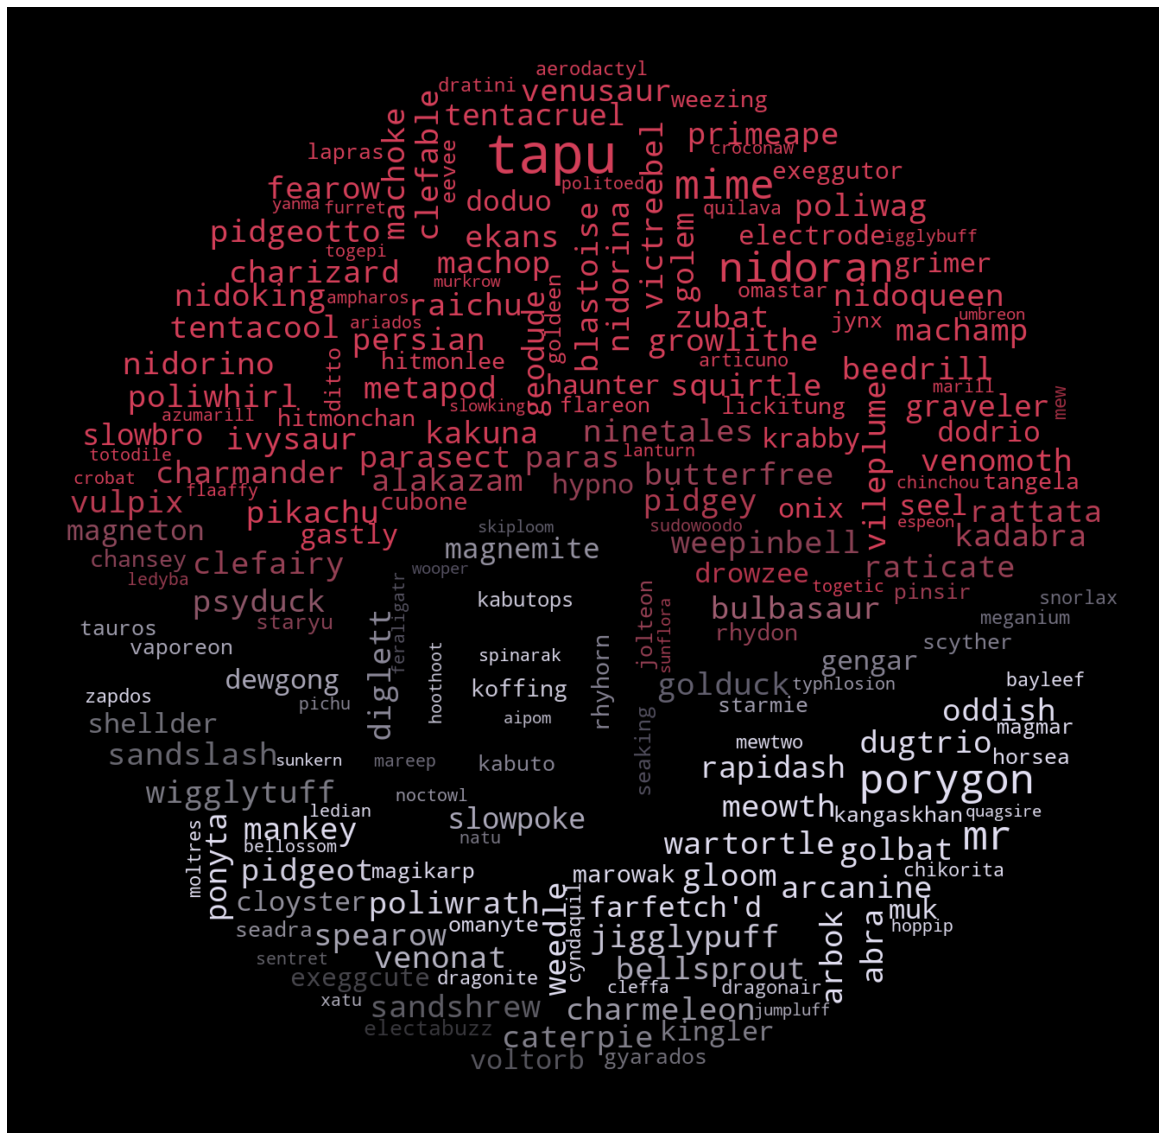

In [47]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import requests
import random

from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from io import BytesIO

df = dfPokemon
df = df.drop_duplicates('name');
  
comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df.name: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

# got from https://webstockreview.net/images/pokeball-clipart-pokemon-free.png

response = requests.get("https://raw.githubusercontent.com/brenoslivio/SCC0652_Computational_Visualization/master/notebooks/Project-2/image/pokeball.png")
img = Image.open(BytesIO(response.content))

pokeball_color = np.array(img)

pokeball_color = pokeball_color[::3, ::3]

# create mask  white is "masked out"
pokeball_mask = pokeball_color.copy()
pokeball_mask[pokeball_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(pokeball_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
pokeball_mask[edges > .08] = 255


wordcloud = WordCloud(width = 4000, height = 4000, 
                background_color = 'black', 
                stopwords = stopwords, 
                mask = pokeball_mask,
                random_state = 42,
                max_font_size = 64,
                min_font_size = 8)

wordcloud.generate(comment_words) 

image_colors = ImageColorGenerator(pokeball_color)

# plot the WordCloud image                        
plt.figure(figsize = (16, 16)) 
plt.imshow(wordcloud.recolor(color_func=image_colors),
           interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 